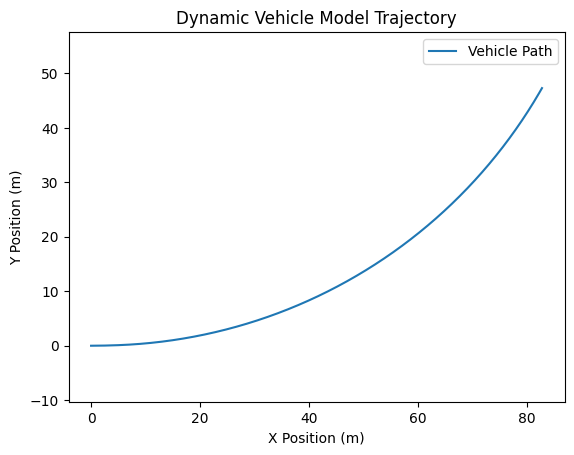

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Vehicle parameters
m = 1500.0   # Mass in kg
I = 3000.0   # Moment of inertia around the center of mass
Lf = 1.5     # Distance from center of mass to front axle
Lr = 1.5     # Distance from center of mass to rear axle
Cf = 19000   # Front cornering stiffness
Cr = 33000   # Rear cornering stiffness

# Time parameters
dt = 0.05    # Time step in seconds
num_steps = 200  # Simulation steps

# Initialize state variables
x, y = 0.0, 0.0       # Position of the vehicle
vx, vy = 10.0, 0.0    # Longitudinal and lateral velocity (vx constant for this example)
yaw = 0.0             # Heading angle
yaw_rate = 0.0        # Yaw rate

def update_state(x, y, vx, vy, yaw, yaw_rate, delta, v):
    # Compute slip angles for front and rear wheels
    alpha_f = delta - np.arctan2(vy + Lf * yaw_rate, vx)
    alpha_r = -np.arctan2(vy - Lr * yaw_rate, vx)
    
    # Calculate lateral forces at front and rear wheels
    Fyf = Cf * alpha_f
    Fyr = Cr * alpha_r
    
    # Equations of motion
    vy_dot = (Fyf + Fyr) / m - vx * yaw_rate
    yaw_rate_dot = (Lf * Fyf - Lr * Fyr) / I
    
    # Update velocities
    vy += vy_dot * dt
    yaw_rate += yaw_rate_dot * dt
    
    # Update position and heading
    yaw += yaw_rate * dt
    x += (vx * np.cos(yaw) - vy * np.sin(yaw)) * dt
    y += (vx * np.sin(yaw) + vy * np.cos(yaw)) * dt
    
    return x, y, vy, yaw, yaw_rate

# Simulation loop with constant inputs
delta = 0.05  # Steering angle in radians
x_data, y_data = [x], [y]

for _ in range(num_steps):
    x, y, vy, yaw, yaw_rate = update_state(x, y, vx, vy, yaw, yaw_rate, delta, vx)
    x_data.append(x)
    y_data.append(y)

# Plot the simulated vehicle path
plt.plot(x_data, y_data, label="Vehicle Path")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Dynamic Vehicle Model Trajectory")
plt.axis("equal")
plt.legend()
plt.show()
